### Introduction to regression with Neural Networks in Tensorflow 
There are many defenitions for a regression problem but in our case, we are going to simplify it: predicting a numerical varable based on some other combination of variables. ie: just predicting a number

In [1]:
## Import Things 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
print(tf.__version__) 

2.16.1


### Create data to view and fit

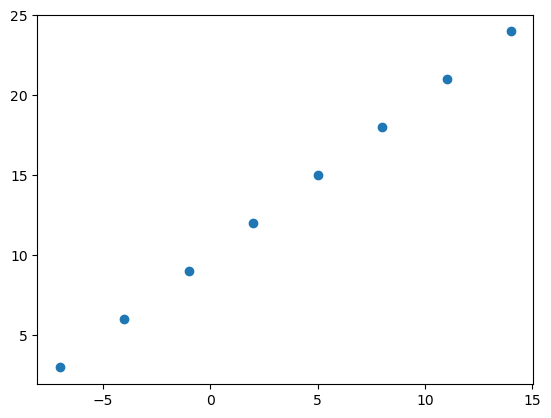

In [2]:
# Creatre features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels  
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulize it  
plt.scatter(X,y)

In [3]:
y == X + 10 # This is the relationship we want to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Create a demo tensor for a generic housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"]) 
house_price = tf.constant([939700])
house_info, house_price 
# In this case the input shape is 3 and the output shape is 1

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

((), ())

In [6]:
X[0].ndim # Scalar

0

In [7]:
X[0], y[0] # We want to make a modle that will take in X[i] and predict y[i]

(-7.0, 3.0)

In [8]:
#  Turn our NumpyArrays into Tensors 
X = tf.constant(X) 
y = tf.constant(y) 
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in Modeling with Tensorflow 
1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - Define the loss function (in other words, the function that tells our model how  wrong it is) and the optimizer (tells our model how to improve the patterns it's learning), and evaluation metrics (what we can  use to interment the performance of our model.)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [10]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # We want to take in one number and predict one number
])

# Complile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=["mae"]
             ) 

# MAE is mean Absolute Error 
# SGD Is Strocastic Gradient Decent (optimizer="sgd") also works

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 15.8279 - mae: 15.8279
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15.5466 - mae: 15.5466
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.2654 - mae: 15.2654
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.9841 - mae: 14.9841
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 14.7869 - mae: 14.7869


In [11]:
# Check out X and y 
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Try and make a prediction using our model 
y_pred = model.predict(np.array([[17.0]])) 
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[-5.761518]], dtype=float32)

### Improving our model 
We can improve our model, by altering the steps we took to create a model 
1. **Creating a model**: Adding more layers, increasing the number of hidden units (neurons) within each of the hidden layers, changing the activation function of each layer
2. **Compiling a model**: Change the optimization function or the **learning rate**. of the optimization function
3. **Fitting a model**: We can fit a model for more **epochs** and let our model look at the training data more times ie leave it training for longer or on more data.

In [13]:
# Lets rebuild the modle but this time we will make it better 

# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
            optimizer = tf.keras.optimizers.SGD(), 
             metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 7.7841 - mae: 7.7841
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6516 - mae: 7.6516
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.5191 - mae: 7.5191
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4438 - mae: 7.4438
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.4381 - mae: 7.4381
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.4325 - mae: 7.4325
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/st

In [14]:
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[30.305248]], dtype=float32)

In [15]:
# Lets see if we can make another change to make  our model better (Add another layer)

In [16]:
# 1. Create the model (with an extra hidden layer wioth 100 hidden units) 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1),
]) 

# 2. Compile the model  
model.compile(loss="mae", 
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=["mae"]) 

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - loss: 12.8289 - mae: 12.8289
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.1464 - mae: 12.1464
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.4626 - mae: 11.4626
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.7761 - mae: 10.7761
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.0857 - mae: 10.0857
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.3894 - mae: 9.3894
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.6841 - mae: 8.6841
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.9662 - mae: 7.9662
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.2312 - mae: 7.2312
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.8685 - mae: 6.8685
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.0987 - mae: 7.0987
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.3778 - mae: 7.3778
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
model.predict(np.array([[17.0]])) # Learning rate is probabally most important Hyperparamater 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[26.1297]], dtype=float32)

### Evaluating a Model

In practice, a typical workflow we will go through when building neural networks is: 

```
Build a model -> Fit it -> Evaluate it -> tweak a model ->
Fit it -> Evaluate it-> Tweak a model -> Fir it -> Evaluate it
...
```

It's a good idea to visualize: 
* **The Data** -- What data are we working with? What does it look like?
* **The Model Itself** -- What does our model look like?
* **The Training of a Model** -- How does a model perform while it learns?
* **The Predictions of the Model** -- How do the predictions of a model line up against the ground truth (the original labels)

In [18]:
# Make a bigger dataset (More Data!)
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [19]:
# Make lables for the dataset 
y = X + 10 
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

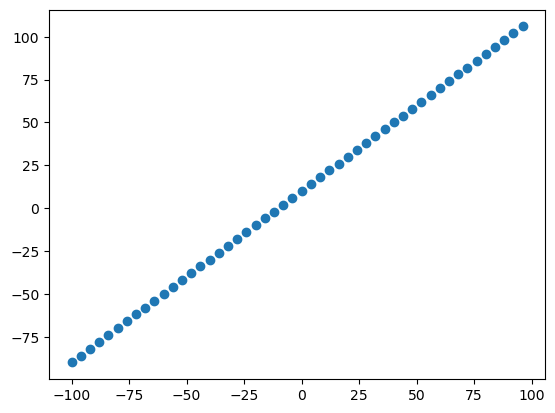

In [20]:
# Vizualize the data 
plt.scatter(X, y)

It's not common practice to fit and evaluate on the same dataset
### The 3 sets are 
1. **Training Set (Class Materials)** -- The model learns from this data, which is typically 70% - 80% of the total data
2. **Validation Set (Practice Exam)** -- The model gets tuned on this data, typically 10% - 15% of the total data
3. **Test Set (Exam)** -- The model gets evaluated on this data to test what is has learned, this is typically 10% - 15% of the total data

In [21]:
# Check the length of how many samples we have 
len(X)

50

In [22]:
# Split the data into train sets and test sets 

# The first 40 is 80% of the total data
X_train = X[:40] 
y_train = y[:40]

# The last 10 is 20% of the total data 
X_test = X[40:] 
y_test = y[40:] 

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data 

Now we have our data in training and test sets ... let's visualize it!

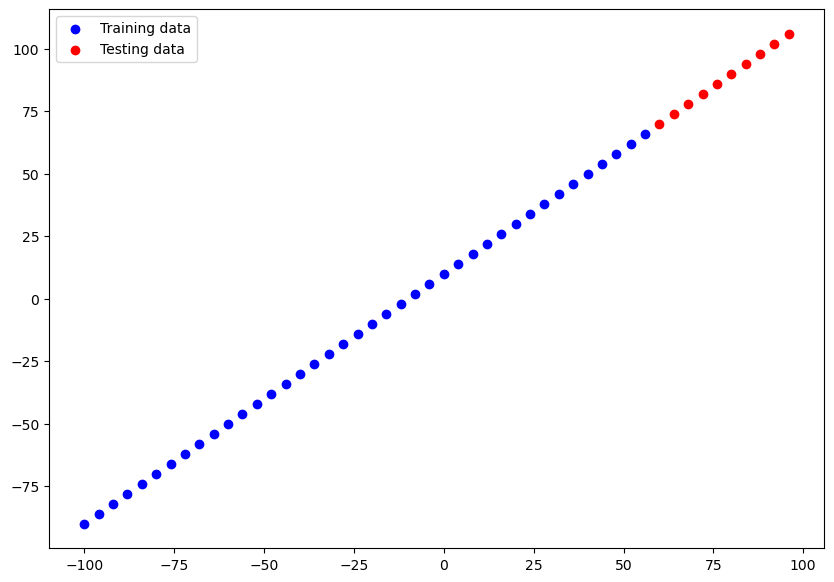

In [23]:
# Set the size of the figure
plt.figure(figsize=(10,7))

# Plot the data in Blue 
plt.scatter(X_train, y_train, c="b", label="Training data") 

# Plot test data in Green
plt.scatter(X_test, y_test, c="r", label="Testing data")  

# Show a legend 
plt.legend();

In [27]:
# Let's have a look at how to  build a neural network for our data

# 1. Create a model 
model = tf. keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"]) 

# # 3. Fit the model 
# model.fit(X_train, y_train, epochs=100)

### Visualization the model 

In [28]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Create a model that builds automatically by defining the input_shape argument in the first layer 
tf.random.set_seed(42) 

# 1. Create a model 
model = tf. keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,))
]) 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"]) 


In [35]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Nontrainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

In [36]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 43.4936 - mae: 43.4936  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0489 - mae: 12.0489 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2252 - mae: 8.2252 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8752 - mae: 8.8752 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8322 - mae: 7.8322 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7850 - mae: 10.7850 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6390 - mae: 7.6390 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9560 - mae: 11.9560 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1432 - mae: 8.1432 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6864 - mae: 8.6864 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5532 - mae: 8.5532 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3214 - mae: 8.3214 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s